In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix

In [3]:

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [5]:
real_news=pd.read_csv('News.csv') #has real news 

In [6]:
viral_news=pd.read_csv('Viral_news.csv') #viral news 

In [7]:
real_news.shape

(4000, 5)

In [8]:
viral_news.shape

(2000, 5)

In [9]:
real_news['label']='REAL'

In [10]:
viral_news['label']='VIRAL'  #my computer was able to hanlde all the data so i took a small section of the data

In [11]:
DF=pd.concat([real_news.head(4000),viral_news.head(2000)]) #now basically all the values has two label either they are 

In [12]:
DF=shuffle(DF)
DF

,Unnamed: 0,title,text,subject,date,label
2567,2567,"Trump praises work on British trade deal, says...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"July 25, 2017",REAL
1671,1671,WATCH: Joe Scarborough Gets MOCKED For Compar...,Joe Scarborough is not having the best morning...,News,"April 26, 2017",VIRAL
1162,1162,U.S. bill to regulate internet ads gains bipar...,(Reuters) - U.S. legislation that would impose...,politicsNews,"October 18, 2017",REAL
3106,3106,Senators want Congress to OK military action i...,WASHINGTON (Reuters) - U.S. senators called on...,politicsNews,"June 20, 2017",REAL
802,802,Russian Lawyer At Trump Jr.’s Meeting Has Wor...,The whole world knows about the bombshell repo...,News,"July 21, 2017",VIRAL
...,...,...,...,...,...,...
1923,1923,John McCain Was Asked If Trump Was Like Reaga...,"For Republicans, being compared to Ronald Reag...",News,"April 2, 2017",VIRAL
1706,1706,"Trump hits back at Clinton, with a golf ball, ...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 17, 2017",REAL
3795,3795,Trump ordered emergency meeting after global c...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"May 14, 2017",REAL
1499,1499,"Trump Ignores Historically Low Rating, Brags ...",The fact that most of the country despises Don...,News,"May 12, 2017",VIRAL


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test=train_test_split(DF['text'],DF['label'],test_size=0.2)

In [15]:
from collections import Counter

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800,)
(1200,)
(4800,)
(1200,)


In [17]:

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer  #we dont have any numerical value
##TF-->term frequency   IDF-->Inverse Document Frequency

In [18]:
vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)

In [19]:
X_train=vectorizer.fit_transform(X_train)  #trainsforming our data 

In [20]:
X_test=vectorizer.transform(X_test) #we can't feed non-numerical data to our models

In [21]:
print(X_test.shape)
print(X_train.shape)

(1200, 37608)
(4800, 37608)


In [22]:
#splitting  of data is done, Train the models now

In [23]:
# GaussianNB   

In [24]:
gauss_model=GaussianNB()
gauss_model.fit(X_train.toarray(),y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
#Logistic Regression and Support Vector Machines

In [26]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Support Vector Machine
SVC_model=SVC()
SVC_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
#Prediction

In [29]:
gauss_pred=gauss_model.predict(X_test.toarray())

In [30]:
lr_pred=lr_model.predict(X_test)

In [31]:
pred=SVC_model.predict(X_test)

In [32]:
#Evaluating the Naive Baise classifier model

In [33]:
conf_gauss=confusion_matrix(y_test,gauss_pred)

In [34]:
class_gauss=classification_report(y_test,gauss_pred)

In [35]:
#Evaluating Logistic Regression MOdel

In [36]:
conf_lr=confusion_matrix(y_test,lr_pred)
class_lr=classification_report(y_test,lr_pred)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
acc1=accuracy_score(y_test,gauss_pred)
##acc1 is for Naive baise classifier
acc4=accuracy_score(y_test,lr_pred)
## acc2 is for Logistic Regression
acc6=accuracy_score(y_test,pred)
#acc6 is for Support Vector Machine
print("Acurracy")
print("GaussianNB",acc1)
print("Logistic Regression",acc4)
print("Support Vector Machine",acc6)
#But accuracy can't only be the model metric
#F1 Score is a better model metric because it depends 


Acurracy
GaussianNB 0.89
Logistic Regression 0.9825
Support Vector Machine 0.995


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1ec323d0>)

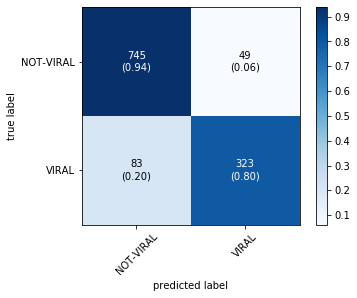

In [39]:
plot_confusion_matrix(conf_mat=conf_gauss,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['NOT-VIRAL','VIRAL'])

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f176310>)

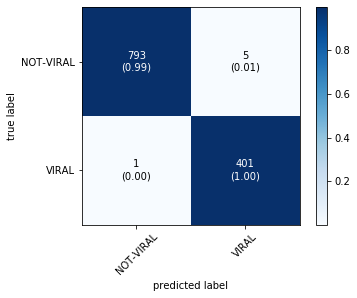

In [40]:
conf_SVC=confusion_matrix(pred,y_test)
plot_confusion_matrix(conf_mat=conf_SVC,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['NOT-VIRAL','VIRAL'])

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1e355510>)

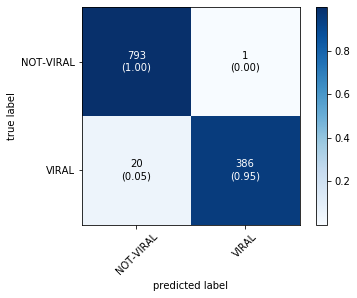

In [41]:
plot_confusion_matrix(conf_mat=conf_lr,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['NOT-VIRAL','VIRAL'])
